NEURAL NETWORK PROJECT

In [1]:
import pandas as pd

In [2]:
df_raw = pd.read_csv('data/BikeRental.csv')

In [3]:
df_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


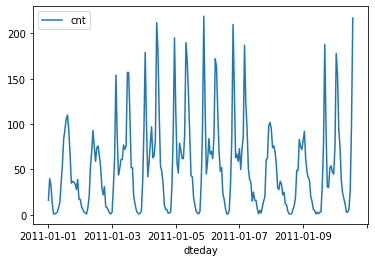

In [4]:
df_raw[:24*10].plot(x='dteday', y='cnt')

In [5]:
df_raw.yr.unique()

array([0, 1], dtype=int64)

In [6]:
df_raw.shape

(17379, 17)

In [7]:
col_list = list(df_raw.columns.values)
for i in col_list:
    print(i)
    print(eval("df_raw."+i+".unique()"))

instant
[    1     2     3 ... 17377 17378 17379]
dteday
['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-29' '2011-01-30'
 '2011-01-31' '2011-02-01' '2011-02-02' '2011-02-03' '2011-02-04'
 '2011-02-05' '2011-02-06' '2011-02-07' '2011-02-08' '2011-02-09'
 '2011-02-10' '2011-02-11' '2011-02-12' '2011-02-13' '2011-02-14'
 '2011-02-15' '2011-02-16' '2011-02-17' '2011-02-18' '2011-02-19'
 '2011-02-20' '2011-02-21' '2011-02-22' '2011-02-23' '2011-02-24'
 '2011-02-25' '2011-02-26' '2011-02-27' '2011-02-28' '2011-03-01'
 '2011-03-02' '2011-03-03' '2011-03-04' '2011-03-05' '2011-03-06'
 '2011-03-07' '2011-03-08' '2011-03-09' '2011-03-10' '2011-03-11'
 '2011-03-12' '2011

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

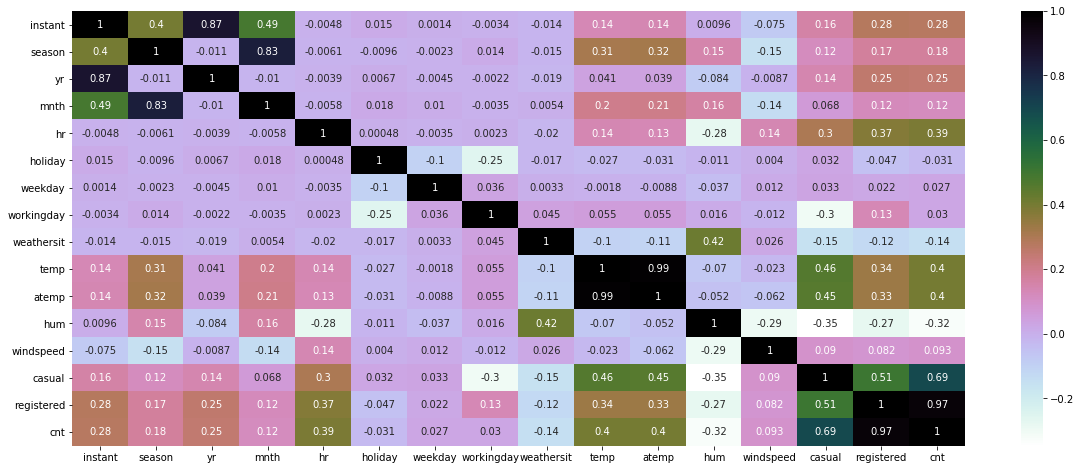

In [9]:
plt.figure(figsize = (20,8))
sns.heatmap(df_raw.corr(), annot=True, cmap="cubehelix_r")
plt.show()

In [10]:
import numpy as np

In [11]:
df_raw = df_raw.fillna(np.nan)
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count())
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
display(missing_data.head(5))

,Total,Percent
cnt,0,0.0
weekday,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0


In [12]:
dummy_fields = ['season','weathersit','mnth','hr','weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(df_raw[each], prefix=each, drop_first=False)
    df_raw = pd.concat([df_raw, dummies],axis = 1)
    
df_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1


In [13]:
fields_to_drop = ['instant','season','weathersit','atemp','workingday','weekday','mnth','hr','dteday']
df_raw = df_raw.drop(fields_to_drop, axis= 1)
df_raw.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
quant_features = ['casual','registered','cnt','temp','hum','windspeed']
scaled_features ={}
for each in quant_features:
  mean,std = df_raw[each].mean(), df_raw[each].std()
  scaled_features[each] = [mean, std]
  df_raw.loc[:,each] = (df_raw[each] - mean)/std

In [15]:
# Save data for approximately the last 21 days
test_data = df_raw[-21*24:]
# Now remove the test data from the data set
df_raw = df_raw[:-21*24]
# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = df_raw.drop(target_fields, axis=1), df_raw[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [16]:
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [17]:
print(train_features.shape)
print(train_targets.shape)
print(len(val_features))
print(len(test_data))

(15435, 56)
(15435, 3)
1440
504


In [18]:
print(train_targets['cnt'].head())

0   -0.956312
1   -0.823998
2   -0.868103
3   -0.972851
4   -1.039008
Name: cnt, dtype: float64


In [21]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

parameters = {'max_depth':[30, 35, 40, 45]}
regr = RandomForestRegressor(random_state=0, n_estimators=200).fit(train_features, train_targets['cnt'])
clf = GridSearchCV(regr, parameters, cv=5, n_jobs=-1)

In [23]:
regr.score(train_features,train_targets['cnt'])

0.9897523708099962

In [24]:
val_y = regr.predict(val_features)
r2_score(val_targets['cnt'], val_y)

0.8213675165476391

In [25]:
import numpy as np

class Network(object):
    ''' Initialization of neural network
        methods: 
        - train(self, features, targets)
        - forward_pass_train(self, X)
        - backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o)
        - update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records)
        - def run(self, features)
    '''

    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, (self.input_nodes, self.hidden_nodes))
        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, (self.hidden_nodes, self.output_nodes))

        self.lr = learning_rate
        self.activation_function = lambda x : 1/(1+np.exp(-x))
                    

    def train(self, features, targets):
        ''' train the network
        '''
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            
            final_outputs, hidden_outputs = self.forward_pass_train(X)
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                        delta_weights_i_h, delta_weights_h_o)
        self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)


    def forward_pass_train(self, X):

        hidden_inputs = np.dot(X, self.weights_input_to_hidden)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output)
        # no activation function in last layer
        final_outputs = final_inputs
        
        return final_outputs, hidden_outputs

    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' Implement backpropagation
        '''
        # Output layer error is the difference between desired target and actual output.
        error = y - final_outputs 

        # Calculate the hidden layer's contribution to the error
        hidden_error = error * self.weights_hidden_to_output

        # Backpropagated error terms
        output_error_term = error
        hidden_error_term = hidden_error.T * hidden_outputs * (1 - hidden_outputs)

        # delta weights
        delta_weights_i_h +=  hidden_error_term * X[:, None]
        delta_weights_h_o += output_error_term * hidden_outputs[:, None]
            
        return delta_weights_i_h, delta_weights_h_o

    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' update delta weights to initial weights
        '''
        self.weights_hidden_to_output += self.lr * delta_weights_h_o / n_records 
        self.weights_input_to_hidden += self.lr * delta_weights_i_h / n_records 

    def run(self, features):
        ''' Run a forward pass through the network with input features 
        '''
        hidden_inputs = np.dot(features,self.weights_input_to_hidden)
        hidden_outputs = self.activation_function(hidden_inputs) 

        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output)
        final_outputs = final_inputs
        
        return final_outputs


In [26]:
import sys

N_i = train_features.shape[1]

# hyperperemeters of network
iterations = 1000
learning_rate = 0.1
hidden_nodes = 5
output_nodes = 1
network = Network(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Select and use random 256 records
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]['cnt']
    network.train(X, y)
 
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                      + "% ... Training loss: " + str(train_loss)[:5] \
                      + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    #for graphing training progress
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.9% ... Training loss: 0.310 ... Validation loss: 0.503

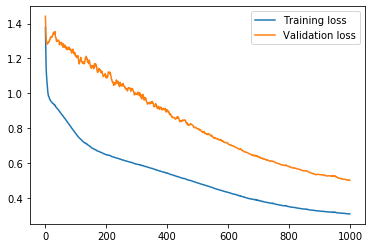

In [27]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()